In [2]:
import os
from scipy.ndimage import rotate, zoom
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import hashlib
%pip install tensorflow
import tensorflow as tf
import time
from pathlib import Path
from PIL import Image
from tqdm import tqdm
from IPython.display import display, Markdown as md
from tensorflow.keras import layers, models, utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import MobileNetV2

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0.0/645.0 MB ? eta -:--:--Downloading tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (645.0 MB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 645.0/645.0 MB 12.2 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 645.0/645.0 MB 12.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0.0/5.9 MB ? eta -:--:--Downloading grpcio-1.71.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.9 MB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.9/5.9 MB 65.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

2025-04-26 06:01:04.602265: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-26 06:01:04.961695: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-26 06:01:05.061458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745647265.176332   13240 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745647265.228947   13240 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745647266.317978   13240 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
# Define the base path for the dataset locally
path = '/workspaces/AtlanticoAvanti/data'
dataset_path = Path(path)

# Defini√ß√£o dos caminhos das pastas de treino e teste dentro do dataset
pasta_treinamento = os.path.join(path, "train")  # Caminho para a pasta de treino
pasta_teste = os.path.join(path, "test")    # Caminho para a pasta de teste

# Definir os caminhos para as subpastas de imagens e m√°scaras
pasta_img_treino = os.path.join(pasta_treinamento, "image")
pasta_mask_treino = os.path.join(pasta_treinamento, "mask")
pasta_img_teste = os.path.join(pasta_teste, "image")
pasta_mask_teste = os.path.join(pasta_teste, "mask")

# Verificar se os caminhos existem
print(f"Verificando caminho base do dataset: {path} (Existe: {os.path.exists(path)})")
print(f"Verificando pasta de treinamento: {pasta_treinamento} (Existe: {os.path.exists(pasta_treinamento)})")
print(f"Verificando pasta de teste: {pasta_teste} (Existe: {os.path.exists(pasta_teste)})")
print("\nVerificando subpastas:")
print(f"Imagens de treino: {pasta_img_treino} (Existe: {os.path.exists(pasta_img_treino)})")
print(f"M√°scaras de treino: {pasta_mask_treino} (Existe: {os.path.exists(pasta_mask_treino)})")
print(f"Imagens de teste: {pasta_img_teste} (Existe: {os.path.exists(pasta_img_teste)})")
print(f"M√°scaras de teste: {pasta_mask_teste} (Existe: {os.path.exists(pasta_mask_teste)})")

Verificando caminho base do dataset: /workspaces/AtlanticoAvanti/data (Existe: True)
Verificando pasta de treinamento: /workspaces/AtlanticoAvanti/data/train (Existe: True)
Verificando pasta de teste: /workspaces/AtlanticoAvanti/data/test (Existe: True)

Verificando subpastas:
Imagens de treino: /workspaces/AtlanticoAvanti/data/train/image (Existe: True)
M√°scaras de treino: /workspaces/AtlanticoAvanti/data/train/mask (Existe: True)
Imagens de teste: /workspaces/AtlanticoAvanti/data/test/image (Existe: True)
M√°scaras de teste: /workspaces/AtlanticoAvanti/data/test/mask (Existe: True)


In [4]:
imagens_info = []
for pasta_raiz, subpastas, arquivos in os.walk(path): #percorrendo diretorios e subdiretorios dentro do caminho em path
  for arquivo in arquivos: #percorre a lista de arquivos dentro da pasta atual
    if arquivo.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')): #se os arquivos tiverem essas extens√µes
      caminho_completo = os.path.join(pasta_raiz, arquivo) # cria o caminho absoluto do arquivo, unindo a pasta onde ele est√° com seu nome.
      categoria = os.path.basename(pasta_raiz) #retorna apenas o nome da √∫ltima pasta no caminho. (ex: "C:/Users/Hanna/Imagens/Dataset/Gatos")
      #ele vai me retornar GATOS
      with Image.open(caminho_completo) as img:
                largura, altura = img.size  # Dimens√µes
                num_pixels = largura * altura  # Total de pixels
                modo = img.mode  # Modo da imagem (RGB, Grayscale etc.)
      imagens_info.append({
          'arquivo' : arquivo, #nome do arquivo da imagem
          'caminho' : caminho_completo, #caminho do arquivo
          'categoria' : categoria, #nome da pasta onde est√° a imagem
          'largura': largura, #adicionei para printar as dimens√µes depois
          'altura': altura, #adicionei para printar as dimens√µes depois
          'num_pixels': num_pixels, #adicionei para printar as dimens√µes depois
          'modo' : modo #modo L indica que a imagem tem 8bits por pixel, 256 n√≠ves de cinza (variando de 0 preto a 255 branco)
          }) #dicionario criado com tres infos: nomedoarquivo / caminho do arquivo / e qual categoria da imagem (mask)

df_imagens = pd.DataFrame(imagens_info) #converte a lista de dicion√°rios em um dataframe do pandas

print(f"Total de imagens: {len(df_imagens)}") #total de imagens = 200

Total de imagens: 200


In [5]:
# Verifica√ß√£o se todas as imagens est√£o no mesmo formato
# Lista para armazenar os formatos das imagens
formatos_imagens = set()

# Usar o dataset_path definido na c√©lula anterior
# dataset_path = Path(path) # Redundant if path is correctly set before

# Percorrer todos os arquivos do diret√≥rio
print(f"Verificando formatos de imagens em: {path}")

# Procurar arquivos de imagem nas pastas definidas
for pasta in [pasta_img_treino, pasta_mask_treino, pasta_img_teste, pasta_mask_teste]:
    if os.path.exists(pasta):
        print(f"Verificando pasta: {pasta}")
        for arquivo in os.listdir(pasta):
            if arquivo.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
                caminho_completo = os.path.join(pasta, arquivo)
                try:
                    with Image.open(caminho_completo) as img:
                        formatos_imagens.add(img.format)
                except Exception as e:
                    print(f"Erro ao processar {caminho_completo}: {e}")
    else:
        print(f"Aviso: Pasta n√£o encontrada - {pasta}")

# Exibe os formatos encontrados
print("\nFormatos de imagem encontrados:", formatos_imagens)

# Verifica se todas as imagens t√™m o mesmo formato
if not formatos_imagens:
    print("Nenhuma imagem encontrada para verificar formatos.")
elif len(formatos_imagens) == 1:
    print(f"Todas as imagens encontradas est√£o no formato {list(formatos_imagens)[0]}.")
else:
    print("As imagens possuem formatos diferentes.")

Verificando formatos de imagens em: /workspaces/AtlanticoAvanti/data
Verificando pasta: /workspaces/AtlanticoAvanti/data/train/image
Verificando pasta: /workspaces/AtlanticoAvanti/data/train/mask
Verificando pasta: /workspaces/AtlanticoAvanti/data/test/image
Verificando pasta: /workspaces/AtlanticoAvanti/data/test/mask

Formatos de imagem encontrados: {'PNG'}
Todas as imagens encontradas est√£o no formato PNG.


In [6]:
if df_imagens[['largura', 'altura']].nunique().sum() == 2: #nunique() conta quantos valores diferentes existem nas colunas largura e altura
    print("Todas as imagens t√™m o mesmo tamanho.")
else:
    print("As imagens t√™m tamanhos diferentes.")

Todas as imagens t√™m o mesmo tamanho.


In [7]:
# Agrupa as imagens por categoria (pasta) e lista os modos de cor encontrados em cada uma
modos_por_categoria = df_imagens.groupby('categoria')['modo'].unique()

# Exibe os modos de cor encontrados para cada categoria
for categoria, modos in modos_por_categoria.items():
    print(f"Na pasta '{categoria}', encontramos os modos de cor: {modos}")

# Cria um dicion√°rio para armazenar inconsist√™ncias
# Se uma categoria tiver mais de um modo de cor, ser√° considerada inconsistente
inconsistencias = {cat: modos for cat, modos in modos_por_categoria.items() if len(modos) > 1}

# Verifica se foram encontradas inconsist√™ncias
if inconsistencias:
    print("\nAten√ß√£o! Algumas categorias possuem imagens com diferentes modos de cor:")
    for cat, modos in inconsistencias.items():
        print(f"- {cat}: {modos}")  # Exibe a categoria e os modos de cor encontrados nela
else:
    print("\nTodas as categorias possuem um √∫nico modo de cor. Nenhuma inconsist√™ncia encontrada.")


Na pasta 'image', encontramos os modos de cor: ['RGB']
Na pasta 'mask', encontramos os modos de cor: ['L']

Todas as categorias possuem um √∫nico modo de cor. Nenhuma inconsist√™ncia encontrada.


In [8]:
def sumario_coluna(df):

    dados_resumo = []

    for nome_coluna in df.columns:
        tipo_coluna = df[nome_coluna].dtype
        valores_distintos = df[nome_coluna].nunique()

        contagem_distintos = None
        if valores_distintos <= 10:
            contagem_distintos = df[nome_coluna].value_counts().to_dict()

        dados_resumo.append([
            nome_coluna,
            str(tipo_coluna),
            valores_distintos,
            contagem_distintos
        ])

    # Markdown para exibi√ß√£o
    saida_markdown = "## üìä Sum√°rio das Colunas\n\n"
    saida_markdown += "| Coluna | Tipo de Dado | Valores Distintos | Distribui√ß√£o dos Valores |\n"
    saida_markdown += "|--------|---------------|-------------------|--------------------------|\n"

    for col in dados_resumo:
        distribuicao = col[3] if col[3] is not None else "N/A"
        saida_markdown += f"| `{col[0]}` | `{col[1]}` | {col[2]} | {distribuicao} |\n"

    display(md(saida_markdown))

# Exemplo de uso
sumario_coluna(df_imagens)

## üìä Sum√°rio das Colunas

| Coluna | Tipo de Dado | Valores Distintos | Distribui√ß√£o dos Valores |
|--------|---------------|-------------------|--------------------------|
| `arquivo` | `object` | 80 | N/A |
| `caminho` | `object` | 200 | N/A |
| `categoria` | `object` | 2 | {'image': 100, 'mask': 100} |
| `largura` | `int64` | 1 | {512: 200} |
| `altura` | `int64` | 1 | {512: 200} |
| `num_pixels` | `int64` | 1 | {262144: 200} |
| `modo` | `object` | 2 | {'RGB': 100, 'L': 100} |


* Visualizando algumas imagens do dataset

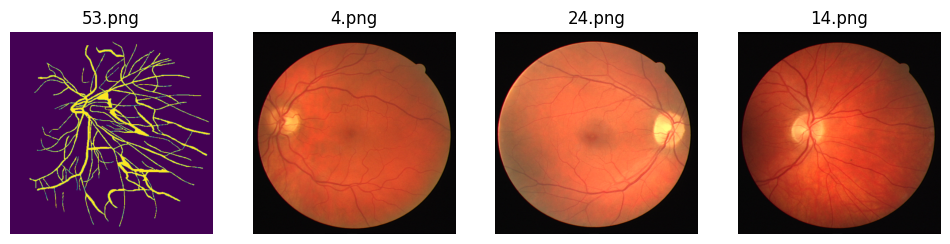

In [9]:
amostras = df_imagens.sample(4)  # visualizando 4 imagens do dataframe

fig, axes = plt.subplots(1, 4, figsize=(12, 6)) #plotando as imagens
for ax, (_, row) in zip(axes, amostras.iterrows()):
    img = Image.open(row["caminho"])  # Abre a imagem
    ax.imshow(img)
    ax.set_title(row["arquivo"])
    ax.axis("off")  # Remove os eixos

plt.show()

Informa√ß√µes complementares, tamanho, pixel e dimens√µes da figura

In [10]:
print(df_imagens[['largura', 'altura', 'num_pixels']].describe()) #n√£o h√° varia√ß√£o nas imagens

       largura  altura  num_pixels
count    200.0   200.0       200.0
mean     512.0   512.0    262144.0
std        0.0     0.0         0.0
min      512.0   512.0    262144.0
25%      512.0   512.0    262144.0
50%      512.0   512.0    262144.0
75%      512.0   512.0    262144.0
max      512.0   512.0    262144.0


* Verificando se h√° imagens corrompidas que n√£o podem abertas ou processadas

In [11]:
def verificar_imagens_corrompidas(caminho_pasta):
    imagens_corrompidas = []

    for raiz, _, arquivos in os.walk(caminho_pasta):  # Percorre recursivamente o diret√≥rio do dataset
        for arquivo in arquivos:
            caminho_arquivo = os.path.join(raiz, arquivo)
            try:
                with Image.open(caminho_arquivo) as imagem:  # Tenta abrir cada imagem
                    imagem.verify()  # Verifica a integridade da imagem
            except (IOError, SyntaxError) as erro:  # Se ocorrer um erro, a imagem √© considerada corrompida
                print(f"Imagem corrompida encontrada: {caminho_arquivo} - Erro: {erro}")
                imagens_corrompidas.append(caminho_arquivo)

    return imagens_corrompidas

# Executa a verifica√ß√£o e exibe o n√∫mero de imagens corrompidas
imagens_corrompidas = verificar_imagens_corrompidas(path)
print(f"N√∫mero de imagens corrompidas: {len(imagens_corrompidas)}")

N√∫mero de imagens corrompidas: 0


Distribui√ß√£o das classes no conjunto de treino: {'image': 80, 'mask': 80}
Distribui√ß√£o das classes no conjunto de teste: {'image': 20, 'mask': 20}


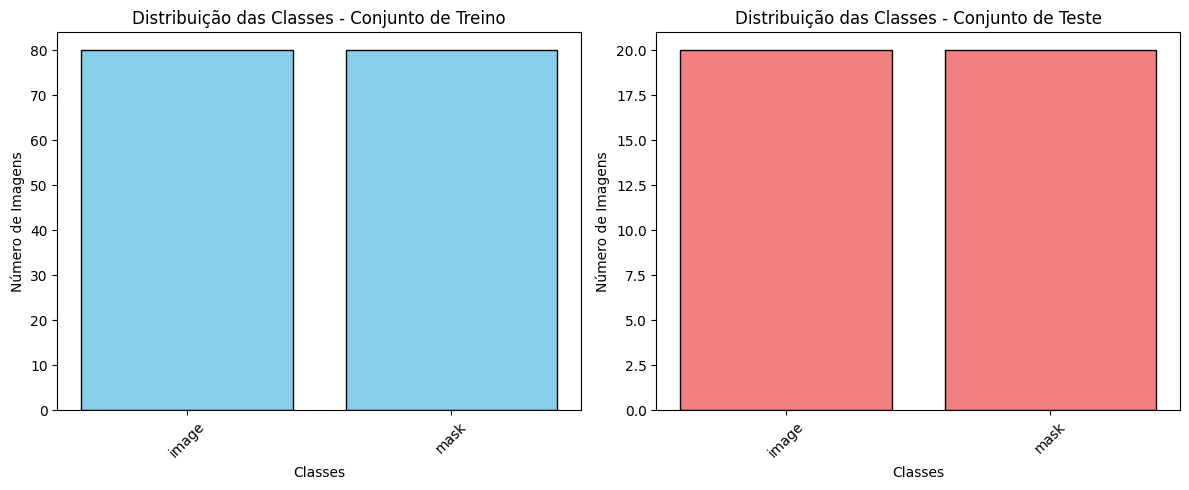

In [12]:
# Fun√ß√£o para contar o n√∫mero de imagens por classe
def contar_imagens_por_classe(caminho_pasta):

    if not os.path.exists(caminho_pasta):  # Verifica se o diret√≥rio existe
        print(f"A pasta '{caminho_pasta}' n√£o foi encontrada.")  # Exibe um aviso caso a pasta n√£o exista
        return {}  # Retorna um dicion√°rio vazio

    # Cria um dicion√°rio onde cada chave √© uma classe (nome da pasta) e o valor √© a quantidade de imagens
    contagem_por_classe = {
        classe: len(os.listdir(os.path.join(caminho_pasta, classe)))
        for classe in os.listdir(caminho_pasta)
        if os.path.isdir(os.path.join(caminho_pasta, classe))  # Considera apenas diret√≥rios
    }

    return contagem_por_classe  # Retorna o dicion√°rio com as contagens

def plotar_distribuicao_classes(contagem_treino, contagem_teste):

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Cria uma figura com 2 gr√°ficos lado a lado

    # Gr√°fico para o conjunto de treino
    axes[0].bar(contagem_treino.keys(), contagem_treino.values(), color='skyblue', edgecolor='black')  # Cria gr√°fico de barras
    axes[0].set_title("Distribui√ß√£o das Classes - Conjunto de Treino")  # Define o t√≠tulo do gr√°fico
    axes[0].set_xlabel("Classes")  # Nomeia o eixo X
    axes[0].set_ylabel("N√∫mero de Imagens")  # Nomeia o eixo Y
    axes[0].tick_params(axis='x', rotation=45)  # Rotaciona os r√≥tulos do eixo X para melhor leitura

    # Gr√°fico para o conjunto de teste
    axes[1].bar(contagem_teste.keys(), contagem_teste.values(), color='lightcoral', edgecolor='black')  # Cria gr√°fico de barras
    axes[1].set_title("Distribui√ß√£o das Classes - Conjunto de Teste")  # Define o t√≠tulo do gr√°fico
    axes[1].set_xlabel("Classes")  # Nomeia o eixo X
    axes[1].set_ylabel("N√∫mero de Imagens")  # Nomeia o eixo Y
    axes[1].tick_params(axis='x', rotation=45)  # Rotaciona os r√≥tulos do eixo X para melhor leitura

    plt.tight_layout()  # Ajusta o layout para evitar sobreposi√ß√£o de elementos
    plt.show()  # Exibe os gr√°ficos

def main():
    # Contagem das imagens por classe em cada conjunto (treino e teste)
    contagem_treino = contar_imagens_por_classe(pasta_treinamento)
    contagem_teste = contar_imagens_por_classe(pasta_teste)

    if not contagem_treino or not contagem_teste:  # Se n√£o houver imagens em um dos conjuntos
        print("N√£o foi poss√≠vel encontrar dados suficientes para an√°lise.")  # Exibe um aviso
        return  # Encerra a execu√ß√£o

    # Exibir contagem das classes no terminal
    print("Distribui√ß√£o das classes no conjunto de treino:", contagem_treino)
    print("Distribui√ß√£o das classes no conjunto de teste:", contagem_teste)

    # Gerar os gr√°ficos de distribui√ß√£o das classes
    plotar_distribuicao_classes(contagem_treino, contagem_teste)


# Garante que o script s√≥ ser√° executado se for chamado diretamente (evita execu√ß√£o acidental ao importar como m√≥dulo)
if __name__ == "__main__":
    main()

* Conferindo imagens duplicadas que possam enviesar os resultados.
  * Para detectar imagens duplicadas no dataset (mesmo que tenham nomes diferentes), podemos comparar os arquivos pelo hash (assinatura digital) de cada imagem. Isso garante que duas imagens id√™nticas ser√£o detectadas mesmo que tenham nomes diferentes.

In [13]:
# Importar o m√≥dulo defaultdict se ainda n√£o foi importado
from collections import defaultdict

# Fun√ß√£o para calcular o hash de uma imagem
def calcular_hash(imagem_path):
    try:
        with Image.open(imagem_path) as img:  # Abre a imagem usando a biblioteca PIL (Pillow)
            img = img.convert("L")  # Converte para escala de cinza para reduzir varia√ß√µes de cor
            return hashlib.md5(img.tobytes()).hexdigest()  # Gera um hash MD5 com os bytes da imagem
    except Exception as e:
        print(f"Erro ao calcular hash para {imagem_path}: {e}")
        return None

# Fun√ß√£o para encontrar duplicatas dentro de uma pasta
def encontrar_duplicatas(pasta):
    hashes = defaultdict(list)  # Dicion√°rio onde a chave √© o hash e o valor √© uma lista de arquivos
    
    # Verificar se a pasta existe
    if not os.path.exists(pasta):
        print(f"Pasta n√£o encontrada: {pasta}")
        return {}
        
    # Percorre todos os arquivos na pasta
    print(f"Verificando duplicatas em: {pasta}")
    for arquivo in tqdm(os.listdir(pasta)):
        caminho_completo = os.path.join(pasta, arquivo)  # Obt√©m o caminho completo do arquivo
        if arquivo.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
            hash_imagem = calcular_hash(caminho_completo)  # Calcula o hash da imagem
            if hash_imagem:
                hashes[hash_imagem].append(caminho_completo)  # Adiciona o arquivo √† lista de imagens com esse hash

    # Dicion√°rio para armazenar apenas os hashes que possuem mais de uma imagem associada
    duplicatas = {}

    # Percorre todos os hashes e suas respectivas listas de arquivos
    for hash_valor, arquivos in hashes.items():
        if len(arquivos) > 1:
            duplicatas[hash_valor] = arquivos

    return duplicatas  # Retorna um dicion√°rio com os arquivos duplicados

# Usar os caminhos definidos anteriormente
pastas_imagem = [pasta_img_treino, pasta_img_teste]
pastas_mask = [pasta_mask_treino, pasta_mask_teste]

# Verificar duplicatas nas imagens
display(md("\nüîç **Duplicatas em imagens:**"))
total_duplicatas_img = 0
for pasta in pastas_imagem:
    duplicatas = encontrar_duplicatas(pasta)
    if duplicatas:
        total_duplicatas_img += sum(len(files) for files in duplicatas.values())
        display(md(f"Duplicatas encontradas em {pasta}:"))
        for h, arquivos in duplicatas.items():
            display(md(f"  - Hash: {h}"))
            for arq in arquivos:
                display(md(f"    * {arq}"))
    else:
        display(md(f"Nenhuma duplicata encontrada em {pasta}"))
if total_duplicatas_img == 0:
    display(md("Nenhuma imagem duplicada encontrada no total."))

# Verificar duplicatas nas m√°scaras
display(md("\nüîç **Duplicatas em m√°scaras:**"))
total_duplicatas_mask = 0
for pasta in pastas_mask:
    duplicatas = encontrar_duplicatas(pasta)
    if duplicatas:
        total_duplicatas_mask += sum(len(files) for files in duplicatas.values())
        display(md(f"Duplicatas encontradas em {pasta}:"))
        for h, arquivos in duplicatas.items():
            display(md(f"  - Hash: {h}"))
            for arq in arquivos:
                display(md(f"    * {arq}"))
    else:
        display(md(f"Nenhuma duplicata encontrada em {pasta}"))
if total_duplicatas_mask == 0:
    display(md("Nenhuma m√°scara duplicada encontrada no total."))


üîç **Duplicatas em imagens:**

Verificando duplicatas em: /workspaces/AtlanticoAvanti/data/train/image


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 80/80 [00:00<00:00, 168.18it/s]


Nenhuma duplicata encontrada em /workspaces/AtlanticoAvanti/data/train/image

Verificando duplicatas em: /workspaces/AtlanticoAvanti/data/test/image


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:00<00:00, 162.62it/s]


Nenhuma duplicata encontrada em /workspaces/AtlanticoAvanti/data/test/image

Nenhuma imagem duplicada encontrada no total.


üîç **Duplicatas em m√°scaras:**

Verificando duplicatas em: /workspaces/AtlanticoAvanti/data/train/mask


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 80/80 [00:00<00:00, 517.99it/s]


Nenhuma duplicata encontrada em /workspaces/AtlanticoAvanti/data/train/mask

Verificando duplicatas em: /workspaces/AtlanticoAvanti/data/test/mask


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:00<00:00, 490.94it/s]


Nenhuma duplicata encontrada em /workspaces/AtlanticoAvanti/data/test/mask

Nenhuma m√°scara duplicada encontrada no total.


Carregando dados de treinamento...
Carregando dados de: /workspaces/AtlanticoAvanti/data/train/image e /workspaces/AtlanticoAvanti/data/train/mask
Encontrados 80 imagens e 80 m√°scaras para processar.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 80/80 [00:00<00:00, 97.49it/s]
2025-04-26 06:01:51.715029: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)

2025-04-26 06:01:51.715029: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Dados de treinamento carregados: (80, 128, 128, 3), (80, 128, 128, 1)
Dataset de treinamento criado com sucesso!

Carregando dados de teste...
Carregando dados de: /workspaces/AtlanticoAvanti/data/test/image e /workspaces/AtlanticoAvanti/data/test/mask
Encontrados 20 imagens e 20 m√°scaras para processar.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:00<00:00, 105.22it/s]

2025-04-26 06:01:52.095847: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-26 06:01:52.095847: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Dados de teste carregados: (20, 128, 128, 3), (20, 128, 128, 1)
Dataset de teste criado com sucesso!

Visualizando amostras do dataset de TREINO para verificar o pr√©-processamento:


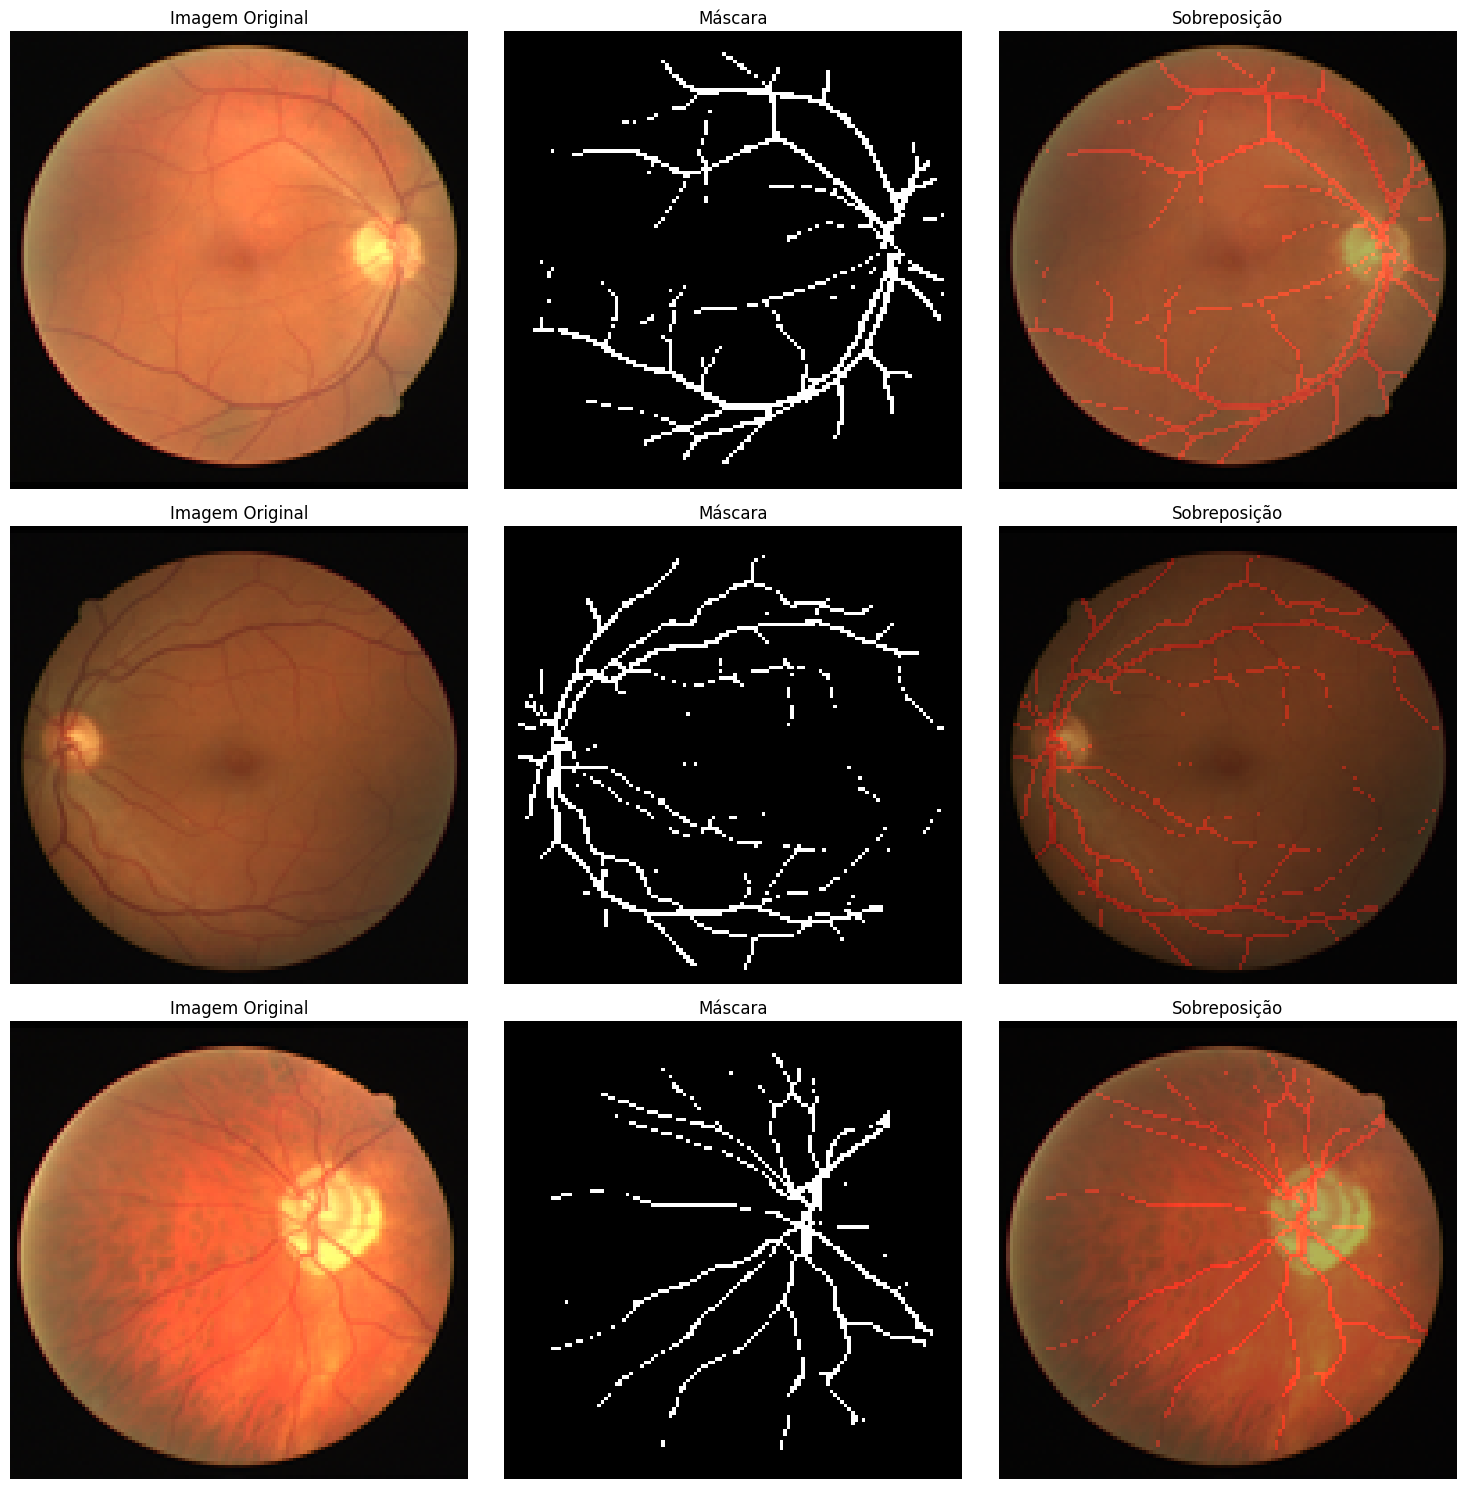

Pr√©-processamento e cria√ß√£o de datasets conclu√≠dos.


In [14]:
# Fun√ß√£o de pr√©-processamento para carregar e redimensionar as imagens
def carregar_e_preprocessar_dados(pasta_imagem, pasta_mascara, tamanho_alvo=(128, 128)):
    # Verificar se as pastas existem
    if not os.path.exists(pasta_imagem):
        raise FileNotFoundError(f"Pasta de imagens n√£o encontrada: {pasta_imagem}")
    if not os.path.exists(pasta_mascara):
        raise FileNotFoundError(f"Pasta de m√°scaras n√£o encontrada: {pasta_mascara}")

    print(f"Carregando dados de: {pasta_imagem} e {pasta_mascara}")
    imagens = []
    mascaras = []

    # Listar os arquivos nas pastas
    arquivos_imagem = sorted([f for f in os.listdir(pasta_imagem)
                             if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))])
    arquivos_mascara = sorted([f for f in os.listdir(pasta_mascara)
                             if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))])

    # Garantir que os nomes dos arquivos (sem extens√£o) correspondem
    nomes_imagem = {os.path.splitext(f)[0] for f in arquivos_imagem}
    nomes_mascara = {os.path.splitext(f)[0] for f in arquivos_mascara}

    if nomes_imagem != nomes_mascara:
        print("Aviso: Nomes de arquivos de imagem e m√°scara n√£o correspondem perfeitamente!")
        print(f"Imagens extras: {nomes_imagem - nomes_mascara}")
        print(f"M√°scaras extras: {nomes_mascara - nomes_imagem}")
        # Continuar apenas com os arquivos que t√™m par
        arquivos_comuns = nomes_imagem.intersection(nomes_mascara)
        arquivos_imagem = sorted([f for f in arquivos_imagem if os.path.splitext(f)[0] in arquivos_comuns])
        arquivos_mascara = sorted([f for f in arquivos_mascara if os.path.splitext(f)[0] in arquivos_comuns])
        print(f"Processando {len(arquivos_comuns)} pares de arquivos correspondentes.")

    print(f"Encontrados {len(arquivos_imagem)} imagens e {len(arquivos_mascara)} m√°scaras para processar.")

    # Processar cada par de imagem e m√°scara
    for arquivo_img, arquivo_mask in tqdm(zip(arquivos_imagem, arquivos_mascara), total=len(arquivos_imagem)):
        try:
            # Carregar imagem e redimensionar
            caminho_imagem = os.path.join(pasta_imagem, arquivo_img)
            img = Image.open(caminho_imagem)
            img = img.resize(tamanho_alvo)
            img_array = np.array(img)

            # Garantir 3 canais (RGB)
            if len(img_array.shape) == 2:
                img_array = np.stack((img_array,) * 3, axis=-1)
            elif img_array.shape[2] == 4: # Remover canal alfa se existir
                 img_array = img_array[:, :, :3]

            # Carregar m√°scara e redimensionar
            caminho_mascara = os.path.join(pasta_mascara, arquivo_mask)
            mask = Image.open(caminho_mascara)
            mask = mask.resize(tamanho_alvo)
            mask_array = np.array(mask)

            # Converter m√°scara para bin√°rio (0 ou 1)
            if len(mask_array.shape) == 3 and mask_array.shape[2] > 1:
                mask_array = np.mean(mask_array, axis=2)
            mask_array = (mask_array > 128).astype(np.float32)

            # Adicionar dimens√£o de canal se necess√°rio
            if len(mask_array.shape) == 2:
                mask_array = np.expand_dims(mask_array, axis=-1)

            # Normalizar imagem (dividir por 255 para escalar entre 0-1)
            img_array = img_array.astype(np.float32) / 255.0

            # Adicionar aos arrays
            imagens.append(img_array)
            mascaras.append(mask_array)
        except Exception as e:
            print(f"Erro ao processar par {arquivo_img}/{arquivo_mask}: {e}")

    return np.array(imagens), np.array(mascaras)

# Criar datasets do TensorFlow para treinamento e teste
def criar_tf_dataset(imagens, mascaras, tamanho_batch=32, shuffle=True):
    if len(imagens) == 0:
        print("Erro: N√£o h√° imagens para criar o dataset.")
        return None
    dataset = tf.data.Dataset.from_tensor_slices((imagens, mascaras))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(imagens))
    dataset = dataset.batch(tamanho_batch)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# Removido: Fun√ß√£o encontrar_pastas_dataset e sua chamada
# Removido: An√°lise de Desbalanceamento de Pixels

# Carregar dados usando os caminhos definidos na c√©lula 9b96b3ad
X_treino, y_treino, X_teste, y_teste = None, None, None, None
treino_dataset, teste_dataset = None, None

if os.path.exists(pasta_img_treino) and os.path.exists(pasta_mask_treino):
    print("\nCarregando dados de treinamento...")
    try:
        X_treino, y_treino = carregar_e_preprocessar_dados(pasta_img_treino, pasta_mask_treino)
        print(f"Dados de treinamento carregados: {X_treino.shape}, {y_treino.shape}")
        treino_dataset = criar_tf_dataset(X_treino, y_treino)
        if treino_dataset:
             print("Dataset de treinamento criado com sucesso!")
    except Exception as e:
        print(f"Erro ao carregar ou criar dataset de treino: {e}")
else:
    print("Erro: Pastas de imagens ou m√°scaras de treinamento n√£o encontradas.")

if os.path.exists(pasta_img_teste) and os.path.exists(pasta_mask_teste):
    print("\nCarregando dados de teste...")
    try:
        X_teste, y_teste = carregar_e_preprocessar_dados(pasta_img_teste, pasta_mask_teste)
        print(f"Dados de teste carregados: {X_teste.shape}, {y_teste.shape}")
        teste_dataset = criar_tf_dataset(X_teste, y_teste, shuffle=False)
        if teste_dataset:
            print("Dataset de teste criado com sucesso!")
    except Exception as e:
        print(f"Erro ao carregar ou criar dataset de teste: {e}")
else:
    print("Erro: Pastas de imagens ou m√°scaras de teste n√£o encontradas.")

# Visualizar algumas imagens para verificar
def visualizar_amostras(dataset, num_amostras=3):
    if dataset is None:
        print("Dataset n√£o dispon√≠vel para visualiza√ß√£o.")
        return
    plt.figure(figsize=(15, 5*num_amostras))
    try:
        for i, (imagens, mascaras) in enumerate(dataset.take(num_amostras)):
            if imagens.shape[0] == 0: continue # Skip empty batches
            imagem = imagens[0].numpy()
            mascara = mascaras[0].numpy()

            # Imagem original
            plt.subplot(num_amostras, 3, i*3+1)
            plt.imshow(imagem)
            plt.title('Imagem Original')
            plt.axis('off')

            # M√°scara
            plt.subplot(num_amostras, 3, i*3+2)
            plt.imshow(mascara[:,:,0], cmap='gray')
            plt.title('M√°scara')
            plt.axis('off')

            # Sobreposi√ß√£o
            plt.subplot(num_amostras, 3, i*3+3)
            # Garantir que a imagem tem 3 canais para sobreposi√ß√£o
            if imagem.shape[-1] == 1:
                imagem_rgb = np.concatenate([imagem]*3, axis=-1)
            else:
                imagem_rgb = imagem.copy()
            mascara_overlay = np.zeros_like(imagem_rgb)
            mascara_overlay[:,:,0] = mascara[:,:,0] * 1.0  # Canal vermelho
            sobreposicao = np.clip(imagem_rgb * 0.7 + mascara_overlay * 0.3, 0, 1)
            plt.imshow(sobreposicao)
            plt.title('Sobreposi√ß√£o')
            plt.axis('off')
    except Exception as e:
        print(f"Erro durante a visualiza√ß√£o: {e}")

    plt.tight_layout()
    plt.show()

# Visualizar alguns exemplos, se o dataset foi criado
if treino_dataset:
    print("\nVisualizando amostras do dataset de TREINO para verificar o pr√©-processamento:")
    visualizar_amostras(treino_dataset)
    print("Pr√©-processamento e cria√ß√£o de datasets conclu√≠dos.")
elif teste_dataset:
    print("\nVisualizando amostras do dataset de TESTE para verificar o pr√©-processamento:")
    visualizar_amostras(teste_dataset)
    print("Pr√©-processamento e cria√ß√£o de datasets conclu√≠dos.")
else:
    print("Nenhum dataset dispon√≠vel para visualiza√ß√£o.")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# --- Mobile Encoder Block ---
def mobile_encoder_block(inputs, filters, dropout_rate=0.1):
    """Creates a mobile encoder block with depthwise separable convolutions."""
    # Depthwise separable convolution (more efficient than standard convolution)
    depthwise = layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same')(inputs)
    pointwise = layers.Conv2D(filters=filters, kernel_size=(1, 1), padding='same')(depthwise)
    
    # Activation and normalization
    x = layers.BatchNormalization()(pointwise)
    x = layers.Activation('relu')(x)
    
    # Second depthwise separable convolution
    depthwise2 = layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same')(x)
    pointwise2 = layers.Conv2D(filters=filters, kernel_size=(1, 1), padding='same')(depthwise2)
    
    x = layers.BatchNormalization()(pointwise2)
    x = layers.Activation('relu')(x)
    
    # Dropout for regularization
    if dropout_rate > 0:
        x = layers.Dropout(dropout_rate)(x)
    
    return x

# --- Spatial Attention ---
def spatial_attention(inputs):
    """Apply spatial attention mechanism."""
    # Average pooling across channel dimension
    avg_pool = tf.reduce_mean(inputs, axis=-1, keepdims=True)
    # Max pooling across channel dimension
    max_pool = tf.reduce_max(inputs, axis=-1, keepdims=True)
    
    # Concatenate the pooled features
    concat = layers.Concatenate()([avg_pool, max_pool])
    
    # Spatial attention map
    attn_map = layers.Conv2D(1, kernel_size=(7, 7), padding='same', activation='sigmoid')(concat)
    
    # Apply attention
    output = layers.Multiply()([inputs, attn_map])
    
    return output

# --- Refinement Module ---
def refinement_module(up_features, skip_features, filters):
    """Refinement module to better combine features from encoder and decoder."""
    # Concatenate up-sampled features with skip connections
    concat = layers.Concatenate()([up_features, skip_features])
    
    # Refine the features with 1x1 convolution
    refined = layers.Conv2D(filters, (1, 1), padding='same')(concat)
    refined = layers.BatchNormalization()(refined)
    refined = layers.Activation('relu')(refined)
    
    # Extract spatial patterns with 3x3 convolution
    refined = layers.Conv2D(filters, (3, 3), padding='same')(refined)
    refined = layers.BatchNormalization()(refined)
    refined = layers.Activation('relu')(refined)
    
    return refined

# --- Transformer Block ---
# --- Transformer Block ---
def transformer_block(inputs, num_heads=4, key_dim=32, ff_dim=None, dropout=0.1):
    """Applies a transformer block with multi-head self-attention and feed-forward network."""
    x = inputs
    input_shape = tf.shape(x) # Use dynamic shape
    # b = input_shape[0] # Batch size (dynamic) - Not needed directly for reshape
    h = input_shape[1] # Height (dynamic)
    w = input_shape[2] # Width (dynamic)
    c = x.shape[-1]    # Channel dimension (needs to be static for Dense layers)

    if c is None:
        # This should ideally not happen if the layers before provide a static channel dim
        raise ValueError("Channel dimension must be statically known for transformer block.")

    # Flatten spatial dimensions to (batch, sequence_length, features)
    # Use dynamic h, w for sequence length calculation
    x_flat = layers.Reshape((h * w, c))(x)

    # Multi-head self-attention
    attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, dropout=dropout)(x_flat, x_flat)
    # Skip connection 1 (Attention)
    x2 = layers.Add()([x_flat, attn_output])
    x2 = layers.LayerNormalization(epsilon=1e-6)(x2) # Added epsilon for stability

    # Feed-forward network
    if ff_dim is None:
        ff_dim = c # Original logic: ff_dim defaults to channel dim
    # Consider using a larger ff_dim, e.g., ff_dim = c * 4
    ff = layers.Dense(ff_dim, activation='relu')(x2)
    # Consider adding dropout here if needed: ff = layers.Dropout(dropout)(ff)
    ff = layers.Dense(c)(ff)

    # Skip connection 2 (FFN)
    x3 = layers.Add()([x2, ff])
    x3 = layers.LayerNormalization(epsilon=1e-6)(x3) # Added epsilon for stability

    # Restore spatial dimensions using dynamic h, w
    x_out = layers.Reshape((h, w, c))(x3)
    return x_out

# --- Modelo UNetMER com Transformers ---
def unetmer_model(input_size=(128, 128, 3), num_classes=1):
    """UNetMER: UNet with Mobile Encoder, Refinement, and Transformer blocks"""
    inputs = layers.Input(input_size)

    # Encoder (caminho de contra√ß√£o)
    enc1 = mobile_encoder_block(inputs, 64, dropout_rate=0.1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(enc1)

    enc2 = mobile_encoder_block(pool1, 128, dropout_rate=0.1)
    enc2 = transformer_block(enc2, num_heads=2, key_dim=32)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(enc2)

    enc3 = mobile_encoder_block(pool2, 256, dropout_rate=0.2)
    enc3 = transformer_block(enc3, num_heads=4, key_dim=32)
    enc3 = spatial_attention(enc3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(enc3)

    enc4 = mobile_encoder_block(pool3, 512, dropout_rate=0.2)
    enc4 = transformer_block(enc4, num_heads=8, key_dim=32)
    enc4 = spatial_attention(enc4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(enc4)

    # Bridge
    bridge = mobile_encoder_block(pool4, 1024, dropout_rate=0.3)
    bridge = transformer_block(bridge, num_heads=8, key_dim=64)

    # Decoder (caminho de expans√£o) com m√≥dulos de refinamento
    up4 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bridge)
    dec4 = refinement_module(up4, enc4, 512)
    dec4 = mobile_encoder_block(dec4, 512, dropout_rate=0.2)
    dec4 = transformer_block(dec4, num_heads=4, key_dim=32)

    up3 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(dec4)
    dec3 = refinement_module(up3, enc3, 256)
    dec3 = mobile_encoder_block(dec3, 256, dropout_rate=0.2)
    dec3 = transformer_block(dec3, num_heads=2, key_dim=32) # Added transformer

    up2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(dec3)
    dec2 = refinement_module(up2, enc2, 128)
    dec2 = mobile_encoder_block(dec2, 128, dropout_rate=0.1)
    # dec2 = transformer_block(dec2, num_heads=1, key_dim=32) # Optional transformer here

    up1 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(dec2)
    dec1 = refinement_module(up1, enc1, 64)
    dec1 = mobile_encoder_block(dec1, 64, dropout_rate=0.1)

    # Output layer
    if num_classes == 1:
        activation = 'sigmoid' # Binary segmentation
    else:
        activation = 'softmax' # Multi-class segmentation
    output_layer = layers.Conv2D(num_classes, (1, 1), activation=activation)(dec1)

    # Cria√ß√£o do modelo
    model = models.Model(inputs=inputs, outputs=output_layer)
    return model

# --- Compila√ß√£o e Treinamento ---
def compile_unetmer(model, learning_rate=1e-4):
    """Compila o modelo UNetMER com otimizador e m√©tricas apropriadas"""
    # M√©tricas personalizadas para segmenta√ß√£o (using tf.reshape)
    def dice_coef(y_true, y_pred, smooth=1e-6): # Use smaller smooth factor
        # Converter explicitamente ambos os tensores para float32
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        # Flatten the tensors using tf.reshape
        y_true_f = tf.reshape(y_true, [-1])
        y_pred_f = tf.reshape(y_pred, [-1])
        # Calculate intersection and sums using tf.reduce_sum
        intersection = tf.reduce_sum(y_true_f * y_pred_f)
        y_true_sum = tf.reduce_sum(y_true_f)
        y_pred_sum = tf.reduce_sum(y_pred_f)
        # Calculate Dice coefficient
        dice = (2. * intersection + smooth) / (y_true_sum + y_pred_sum + smooth)
        return dice

    def dice_loss(y_true, y_pred):
        return 1.0 - dice_coef(y_true, y_pred) # Ensure float subtraction

    def bce_dice_loss(y_true, y_pred):
        # Combina√ß√£o de binary crossentropy e dice loss
        # Garantir que ambos os tensores estejam no mesmo tipo de dados para evitar erros
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        return tf.keras.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

    # Configura√ß√£o do otimizador com learning rate schedule
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Compila√ß√£o do modelo
    model.compile(
        optimizer=optimizer,
        loss=bce_dice_loss,
        metrics=[
            dice_coef,
            'binary_accuracy',
            tf.keras.metrics.Recall(),
            tf.keras.metrics.Precision()
        ]
    )

    return model

def get_improved_callbacks(model_name='unetmer_retina'):
    """Callbacks para monitorar e otimizar o treinamento"""
    # Redu√ß√£o do learning rate se houver estagna√ß√£o no treinamento
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    # Early stopping para evitar overfitting
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    # Checkpoint para salvar o melhor modelo
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        f"{model_name}_best.h5",
        monitor='val_dice_coef',
        mode='max',
        save_best_only=True,
        verbose=1
    )

    # TensorBoard para visualiza√ß√£o do treinamento
    tensorboard = tf.keras.callbacks.TensorBoard(
        log_dir=f'./logs/{model_name}',
        histogram_freq=1
    )

    return [reduce_lr, early_stop, checkpoint, tensorboard]





In [ ]:
# Corrigir o transformer_block na defini√ß√£o do modelo
def fixed_transformer_block(inputs, num_heads=4, key_dim=32, ff_dim=None, dropout=0.1):
	"""Applies a transformer block with multi-head self-attention and feed-forward network."""
	x = inputs
	# Obt√©m as dimens√µes espaciais diretamente do tensor de entrada
	shape = inputs.shape
	b, h, w, c = shape[0], shape[1], shape[2], shape[3]
	
	# Converte o tensor 4D para 3D para aplicar a aten√ß√£o (batch, seq_len, features)
	x_flat = layers.Reshape((-1, c))(x)  # Reshape autom√°tico usando -1
	
	# Multi-head self-attention
	attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, dropout=dropout)(x_flat, x_flat)
	# Skip connection 1 (Attention)
	x2 = layers.Add()([x_flat, attn_output])
	x2 = layers.LayerNormalization(epsilon=1e-6)(x2)

	# Feed-forward network
	if ff_dim is None:
		ff_dim = c * 2  # Usar dimens√£o maior para capturar mais informa√ß√µes
	ff = layers.Dense(ff_dim, activation='relu')(x2)
	ff = layers.Dropout(dropout)(ff)  # Adicionar dropout para regulariza√ß√£o
	ff = layers.Dense(c)(ff)

	# Skip connection 2 (FFN)
	x3 = layers.Add()([x2, ff])
	x3 = layers.LayerNormalization(epsilon=1e-6)(x3)
	
	# Restaura as dimens√µes espaciais
	x_out = layers.Reshape((h, w, c))(x3)
	return x_out

# Update the unetmer_model function to use our fixed transformer block
def fixed_unetmer_model(input_size=(128, 128, 3), num_classes=1):
	"""UNetMER com transformer block corrigido que evita problemas de reshape din√¢mico"""
	# Salve a implementa√ß√£o original
	original_transformer = transformer_block
	
	# Substitua temporariamente pelo nosso transformer_block corrigido
	global transformer_block
	transformer_block = fixed_transformer_block
	
	try:
		# Criar o modelo usando a implementa√ß√£o corrigida
		print("Criando modelo UNetMER com transformer block corrigido...")
		model = unetmer_model(input_size, num_classes)
		print("Modelo criado com sucesso!")
	finally:
		# Restaurar a implementa√ß√£o original
		transformer_block = original_transformer
	
	return model

# Instanciar o modelo UNetMER com a implementa√ß√£o corrigida
try:
	unetmer = fixed_unetmer_model(input_size=(128, 128, 3), num_classes=1)
	unetmer = compile_unetmer(unetmer)
	# Exibir o resumo do modelo
	unetmer.summary()
	print("\nModelo UNetMER compilado com sucesso e pronto para treinamento!")
except Exception as e:
	print(f"Erro ao criar o modelo: {e}")
	print("Tentando abordagem alternativa...")
	
	# Implementa√ß√£o alternativa mais simples do transformer block
	def simple_transformer_block(inputs, num_heads=4, key_dim=32, ff_dim=None, dropout=0.1):
		"""Vers√£o simplificada do transformer block que usa o MultiHeadAttention diretamente no tensor 4D"""
		x = inputs
		c = inputs.shape[-1]
		
		# Uma abordagem mais simples √© usar uma convencional Conv2D para projetar os canais
		# e ent√£o aplicar uma aten√ß√£o espacial
		proj = layers.Conv2D(c, kernel_size=1, activation='relu')(inputs)
		proj = layers.BatchNormalization()(proj)
		
		# Aplicar uma forma simples de self-attention
		attn_map = layers.Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')(proj)
		attn_output = layers.Multiply()([inputs, attn_map])
		
		# Skip connection
		x = layers.Add()([inputs, attn_output])
		x = layers.BatchNormalization()(x)
		
		# Sa√≠da com processamento final
		x = layers.Conv2D(c, kernel_size=3, padding='same', activation='relu')(x)
		x = layers.BatchNormalization()(x)
		return x
	
	# Usar a implementa√ß√£o alternativa do transformer_block
	global transformer_block
	transformer_block = simple_transformer_block
	
	# Tentar criar o modelo novamente
	try:
		print("\nTentando criar modelo com implementa√ß√£o alternativa de transformer...")
		unetmer = unetmer_model(input_size=(128, 128, 3), num_classes=1)
		unetmer = compile_unetmer(unetmer)
		unetmer.summary()
		print("\nModelo alternativo compilado com sucesso!")
	except Exception as e2:
		print(f"Segunda tentativa falhou: {e2}")
		print("\nRecomendamos revisitar a arquitetura do modelo para compatibilidade com TensorFlow.")

In [ ]:
#Treinar o modelo UNetMER
history_unetmer = None # Inicializar
if 'treino' in geradores and 'teste' in geradores:
    print("Iniciando treinamento do UNetMER...")
    EPOCHS = 50 # N√∫mero de √©pocas
    try:
        history_unetmer = unetmer.fit(
             geradores['treino'],
             epochs=EPOCHS,
             validation_data=geradores['teste'],
             callbacks=get_improved_callbacks() # Adicionar callbacks
        )
        print("Treinamento conclu√≠do.")
    except Exception as e:
        print(f"Erro durante o treinamento: {e}")
else:
    print("Erro: Geradores de treino ou teste n√£o est√£o dispon√≠veis. Treinamento cancelado.")

# Avaliar o modelo ap√≥s o treinamento (se o treinamento ocorreu)
if history_unetmer is not None and 'teste' in geradores:
    print("\nAvaliando o modelo UNetMER final...")
    evaluate_unetmer(unetmer, geradores['teste'])
    # Plotar o hist√≥rico de treinamento
    plot_unetmer_training_history(history_unetmer)
elif 'teste' in geradores:
    print("\nTreinamento n√£o ocorreu ou falhou. Tentando avaliar modelo pr√©-treino (se existir)...")
    evaluate_unetmer(unetmer, geradores['teste'])
else:
     print("\nNem treinamento nem avalia√ß√£o podem ser executados devido a erros anteriores.")

In [ ]:
def evaluate_unetmer(model, test_generator, num_samples=5):
    if test_generator is None:
        print("Erro: Gerador de teste n√£o dispon√≠vel para avalia√ß√£o.")
        return
    if len(test_generator) == 0:
        print("Aviso: Gerador de teste est√° vazio. Avalia√ß√£o pulada.")
        return

    """
    Avalia e visualiza os resultados do modelo UNetMER
    """
    # Avaliar o modelo no conjunto de teste
    print("\nAvaliando modelo no conjunto de teste...")
    try:
        test_results = model.evaluate(test_generator, verbose=1)
        print("\nResultados da avalia√ß√£o do UNetMER:")
        metrics_dict = dict(zip(model.metrics_names, test_results))
        for metric, value in metrics_dict.items():
            print(f"{metric}: {value:.4f}")
    except Exception as e:
        print(f"Erro durante a avalia√ß√£o: {e}")
        return

    # Obter um batch de dados para visualiza√ß√£o e matriz de confus√£o
    print("\nObtendo batch de teste para visualiza√ß√£o...")
    try:
        x_batch, y_batch = next(iter(test_generator))
        if x_batch.shape[0] == 0:
             print("Gerador retornou um batch vazio. Pulando visualiza√ß√£o.")
             return
    except StopIteration:
        print("Gerador de teste esgotado ou vazio. N√£o √© poss√≠vel visualizar.")
        return
    except Exception as e:
        print(f"Erro ao obter batch do gerador: {e}")
        return

    # Fazer previs√µes com o modelo
    print("Realizando previs√µes...")
    try:
        predictions_prob = model.predict(x_batch)
    except Exception as e:
        print(f"Erro durante a predi√ß√£o: {e}")
        return

    # Binarizar as previs√µes para visualiza√ß√£o e m√©tricas
    limiar = 0.15
    print(f"Usando limiar de {limiar} para binariza√ß√£o.")
    predictions_binary = (predictions_prob > limiar).astype(np.float32)

    # Visualizar algumas previs√µes
    print("Gerando visualiza√ß√µes...")
    num_to_show = min(num_samples, len(x_batch))
    fig, axes = plt.subplots(num_to_show, 4, figsize=(20, 5 * num_to_show))
    if num_to_show == 1:
        axes = np.expand_dims(axes, axis=0)

    for i in range(num_to_show):
        # Imagem original
        axes[i, 0].imshow(x_batch[i])
        axes[i, 0].set_title('Imagem Original')
        axes[i, 0].axis('off')

        # M√°scara real
        axes[i, 1].imshow(y_batch[i, :, :, 0], cmap='gray')
        axes[i, 1].set_title('M√°scara Real')
        axes[i, 1].axis('off')

        # M√°scara Prevista (Probabilidades)
        im = axes[i, 2].imshow(predictions_prob[i, :, :, 0], cmap='viridis', vmin=0, vmax=1)
        axes[i, 2].set_title('Previs√£o (Probabilidades)')
        axes[i, 2].axis('off')
        fig.colorbar(im, ax=axes[i, 2], fraction=0.046, pad=0.04)

        # M√°scara Prevista (Binarizada)
        axes[i, 3].imshow(predictions_binary[i, :, :,0], cmap='gray')
        axes[i, 3].set_title(f'Previs√£o Binarizada (limiar={limiar})')
        axes[i, 3].axis('off')
    plt.tight_layout()
    plt.show()

    # Calcular e visualizar a matriz de confus√£o (usando todo o batch)
    print("\nCalculando Matriz de Confus√£o (baseada no batch visualizado)...")
    y_true_flat = (y_batch.flatten() > 0.5).astype(int)
    y_pred_flat = (predictions_prob.flatten() > limiar).astype(int)

    unique_true = np.unique(y_true_flat)
    unique_pred = np.unique(y_pred_flat)
    print(f"Valores √∫nicos em y_true_flat: {unique_true}")
    print(f"Valores √∫nicos em y_pred_flat: {unique_pred}")

    try:
        # Especificar labels para garantir formato 2x2 mesmo se uma classe faltar
        cm = confusion_matrix(y_true_flat, y_pred_flat, labels=[0, 1])
        print("Matriz de Confus√£o (Fundo=0, Vaso=1):\n", cm)

        plt.figure(figsize=(8, 6))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fundo', 'Vaso'])
        disp.plot(cmap='Blues')
        plt.title(f'Matriz de Confus√£o - UNetMER (limiar={limiar})')
        plt.show()

        # Calcular m√©tricas apenas se a matriz for 2x2
        if cm.shape == (2, 2):
            print("\nM√©tricas de avalia√ß√£o detalhadas (baseadas no batch):")
            tn, fp, fn, tp = cm.ravel()
            precision_val = tp / (tp + fp + 1e-7)
            recall_val = tp / (tp + fn + 1e-7)
            f1_score_val = 2 * precision_val * recall_val / (precision_val + recall_val + 1e-7)
            accuracy_val = (tp + tn) / (tp + tn + fp + fn + 1e-7)
            print(f"Acur√°cia: {accuracy_val:.4f}")
            print(f"Precis√£o (Vaso): {precision_val:.4f}")
            print(f"Recall (Sensibilidade Vaso): {recall_val:.4f}")
            print(f"F1-Score (Vaso): {f1_score_val:.4f}")
        else:
            print("Matriz de confus√£o n√£o tem formato 2x2, m√©tricas detalhadas n√£o calculadas.")

    except ValueError as e:
        print(f"Erro ao calcular ou plotar matriz de confus√£o: {e}")

# Plotar hist√≥rico de treinamento (vers√£o corrigida)
def plot_unetmer_training_history(history):
    if history is None or not hasattr(history, 'history') or not history.history:
        print("Hist√≥rico de treinamento n√£o dispon√≠vel para plotar.")
        return

    # ... (restante da fun√ß√£o plot_unetmer_training_history permanece igual)
    # Primeiro, vamos verificar quais m√©tricas est√£o dispon√≠veis no hist√≥rico
    print("\nPlotando hist√≥rico de treinamento...")
    print("M√©tricas dispon√≠veis no hist√≥rico:", list(history.history.keys()))

    # Definir mapeamentos para m√©tricas poss√≠veis (nomes comuns no Keras)
    metric_mappings = {
        'loss': 'loss',
        'dice_coef': 'dice_coef',  # Nossa m√©trica personalizada
        'binary_accuracy': ['binary_accuracy', 'accuracy'],  # Poss√≠veis nomes para acur√°cia
        'recall': ['recall', 'recall_1', 'recall_2', 'recall_3'],  # Poss√≠veis nomes para recall
        'precision': ['precision', 'precision_1', 'precision_2', 'precision_3']  # Poss√≠veis nomes para precis√£o
    }

    # Encontrar os nomes reais no hist√≥rico
    available_metrics = {}
    for key, possible_names in metric_mappings.items():
        if isinstance(possible_names, list):
            for name in possible_names:
                # Check for train metric
                if name in history.history and f'val_{name}' in history.history:
                    available_metrics[key] = name
                    break
        else:
             # Check for train metric
            if possible_names in history.history and f'val_{possible_names}' in history.history:
                available_metrics[key] = possible_names

    # Exibir as m√©tricas dispon√≠veis encontradas que ser√£o plotadas
    print("M√©tricas mapeadas para plotagem (treino e valida√ß√£o dispon√≠veis):", available_metrics)

    # Definir m√©tricas e t√≠tulos para plotar (apenas as dispon√≠veis com treino e valida√ß√£o)
    metrics_to_plot = []
    titles_to_plot = []

    if 'loss' in available_metrics:
        metrics_to_plot.append(available_metrics['loss'])
        titles_to_plot.append('Loss (BCE + Dice)')

    if 'dice_coef' in available_metrics:
        metrics_to_plot.append(available_metrics['dice_coef'])
        titles_to_plot.append('Dice Coefficient')

    if 'binary_accuracy' in available_metrics:
        metrics_to_plot.append(available_metrics['binary_accuracy'])
        titles_to_plot.append('Acur√°cia Bin√°ria')

    if 'recall' in available_metrics:
        metrics_to_plot.append(available_metrics['recall'])
        titles_to_plot.append('Recall (Vaso)')

    if 'precision' in available_metrics:
        metrics_to_plot.append(available_metrics['precision'])
        titles_to_plot.append('Precision (Vaso)')

    # Criar subplots din√¢micos baseados no n√∫mero de m√©tricas dispon√≠veis
    n_metrics = len(metrics_to_plot)
    if n_metrics == 0:
        print("Nenhuma m√©trica v√°lida com dados de treino e valida√ß√£o encontrada no hist√≥rico para plotar.")
        return

    # Calcular layout ideal para os subplots
    cols = min(3, n_metrics)
    rows = (n_metrics + cols - 1) // cols  # Arredondar para cima: (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
    if n_metrics == 1:  # Caso especial para apenas uma m√©trica
        axes = np.array([axes])
    axes = axes.flatten()

    # Plotar cada m√©trica
    for i, (metric, title) in enumerate(zip(metrics_to_plot, titles_to_plot)):
        if i < len(axes):
            axes[i].plot(history.history[metric], label=f'Treino')
            val_metric = f'val_{metric}'
            # We already checked val_metric exists
            axes[i].plot(history.history[val_metric], label=f'Valida√ß√£o')
            axes[i].set_title(title)
            axes[i].set_xlabel('√âpoca')
            axes[i].set_ylabel(title)
            axes[i].legend()

    # Desativar eixos extras n√£o utilizados
    for i in range(n_metrics, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Avaliar o modelo ap√≥s o treinamento (se o treinamento ocorreu)
if history_unetmer is not None and 'teste' in geradores:
    print("\nAvaliando o modelo UNetMER final...")
    evaluate_unetmer(unetmer, geradores['teste'])
    # Plotar o hist√≥rico de treinamento
    plot_unetmer_training_history(history_unetmer)
elif 'teste' in geradores:
    print("\nTreinamento n√£o ocorreu ou falhou. Tentando avaliar modelo pr√©-treino (se existir)...")
    evaluate_unetmer(unetmer, geradores['teste'])
else:
     print("\nNem treinamento nem avalia√ß√£o podem ser executados devido a erros anteriores.")

In [ ]:
#Treinar o modelo UNetMER
history_unetmer = None # Inicializar
if 'treino' in geradores and 'teste' in geradores:
    print("Iniciando treinamento do UNetMER...")
    EPOCHS = 50 # N√∫mero de √©pocas
    try:
        history_unetmer = unetmer.fit(
             geradores['treino'],
             epochs=EPOCHS,
             validation_data=geradores['teste'],
             callbacks=get_improved_callbacks() # Adicionar callbacks
        )
        print("Treinamento conclu√≠do.")
    except Exception as e:
        print(f"Erro durante o treinamento: {e}")
else:
    print("Erro: Geradores de treino ou teste n√£o est√£o dispon√≠veis. Treinamento cancelado.")

# Avaliar o modelo ap√≥s o treinamento (se o treinamento ocorreu)
if history_unetmer is not None and 'teste' in geradores:
    print("\nAvaliando o modelo UNetMER final...")
    evaluate_unetmer(unetmer, geradores['teste'])
    # Plotar o hist√≥rico de treinamento
    plot_unetmer_training_history(history_unetmer)
elif 'teste' in geradores:
    print("\nTreinamento n√£o ocorreu ou falhou. Tentando avaliar modelo pr√©-treino (se existir)...")
    evaluate_unetmer(unetmer, geradores['teste'])
else:
     print("\nNem treinamento nem avalia√ß√£o podem ser executados devidoa erros anteriores.")

In [ ]:
def evaluate_unetmer(model, test_generator, num_samples=5):
    if test_generator is None:
        print("Erro: Gerador de teste n√£o dispon√≠vel para avalia√ß√£o.")
        return
    if len(test_generator) == 0:
        print("Aviso: Gerador de teste est√° vazio. Avalia√ß√£o pulada.")
        return

    """
    Avalia e visualiza os resultados do modelo UNetMER
    """
    # Avaliar o modelo no conjunto de teste
    print("\nAvaliando modelo no conjunto de teste...")
    try:
        test_results = model.evaluate(test_generator, verbose=1)
        print("\nResultados da avalia√ß√£o do UNetMER:")
        metrics_dict = dict(zip(model.metrics_names, test_results))
        for metric, value in metrics_dict.items():
            print(f"{metric}: {value:.4f}")
    except Exception as e:
        print(f"Erro durante a avalia√ß√£o: {e}")
        return

    # Obter um batch de dados para visualiza√ß√£o e matriz de confus√£o
    print("\nObtendo batch de teste para visualiza√ß√£o...")
    try:
        x_batch, y_batch = next(iter(test_generator))
        if x_batch.shape[0] == 0:
             print("Gerador retornou um batch vazio. Pulando visualiza√ß√£o.")
             return
    except StopIteration:
        print("Gerador de teste esgotado ou vazio. N√£o √© poss√≠vel visualizar.")
        return
    except Exception as e:
        print(f"Erro ao obter batch do gerador: {e}")
        return

    # Fazer previs√µes com o modelo
    print("Realizando previs√µes...")
    try:
        predictions_prob = model.predict(x_batch)
    except Exception as e:
        print(f"Erro durante a predi√ß√£o: {e}")
        return

    # Binarizar as previs√µes para visualiza√ß√£o e m√©tricas
    limiar = 0.15
    print(f"Usando limiar de {limiar} para binariza√ß√£o.")
    predictions_binary = (predictions_prob > limiar).astype(np.float32)

    # Visualizar algumas previs√µes
    print("Gerando visualiza√ß√µes...")
    num_to_show = min(num_samples, len(x_batch))
    fig, axes = plt.subplots(num_to_show, 4, figsize=(20, 5 * num_to_show))
    if num_to_show == 1:
        axes = np.expand_dims(axes, axis=0)

    for i in range(num_to_show):
        # Imagem original
        axes[i, 0].imshow(x_batch[i])
        axes[i, 0].set_title('Imagem Original')
        axes[i, 0].axis('off')

        # M√°scara real
        axes[i, 1].imshow(y_batch[i, :, :, 0], cmap='gray')
        axes[i, 1].set_title('M√°scara Real')
        axes[i, 1].axis('off')

        # M√°scara Prevista (Probabilidades)
        im = axes[i, 2].imshow(predictions_prob[i, :, :, 0], cmap='viridis', vmin=0, vmax=1)
        axes[i, 2].set_title('Previs√£o (Probabilidades)')
        axes[i, 2].axis('off')
        fig.colorbar(im, ax=axes[i, 2], fraction=0.046, pad=0.04)

        # M√°scara Prevista (Binarizada)
        axes[i, 3].imshow(predictions_binary[i, :, :,0], cmap='gray')
        axes[i, 3].set_title(f'Previs√£o Binarizada (limiar={limiar})')
        axes[i, 3].axis('off')
    plt.tight_layout()
    plt.show()

    # Calcular e visualizar a matriz de confus√£o (usando todo o batch)
    print("\nCalculando Matriz de Confus√£o (baseada no batch visualizado)...")
    y_true_flat = (y_batch.flatten() > 0.5).astype(int)
    y_pred_flat = (predictions_prob.flatten() > limiar).astype(int)

    unique_true = np.unique(y_true_flat)
    unique_pred = np.unique(y_pred_flat)
    print(f"Valores √∫nicos em y_true_flat: {unique_true}")
    print(f"Valores √∫nicos em y_pred_flat: {unique_pred}")

    try:
        # Especificar labels para garantir formato 2x2 mesmo se uma classe faltar
        cm = confusion_matrix(y_true_flat, y_pred_flat, labels=[0, 1])
        print("Matriz de Confus√£o (Fundo=0, Vaso=1):\n", cm)

        plt.figure(figsize=(8, 6))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fundo', 'Vaso'])
        disp.plot(cmap='Blues')
        plt.title(f'Matriz de Confus√£o - UNetMER (limiar={limiar})')
        plt.show()

        # Calcular m√©tricas apenas se a matriz for 2x2
        if cm.shape == (2, 2):
            print("\nM√©tricas de avalia√ß√£o detalhadas (baseadas no batch):")
            tn, fp, fn, tp = cm.ravel()
            precision_val = tp / (tp + fp + 1e-7)
            recall_val = tp / (tp + fn + 1e-7)
            f1_score_val = 2 * precision_val * recall_val / (precision_val + recall_val + 1e-7)
            accuracy_val = (tp + tn) / (tp + tn + fp + fn + 1e-7)
            print(f"Acur√°cia: {accuracy_val:.4f}")
            print(f"Precis√£o (Vaso): {precision_val:.4f}")
            print(f"Recall (Sensibilidade Vaso): {recall_val:.4f}")
            print(f"F1-Score (Vaso): {f1_score_val:.4f}")
        else:
            print("Matriz de confus√£o n√£o tem formato 2x2, m√©tricas detalhadas n√£o calculadas.")

    except ValueError as e:
        print(f"Erro ao calcular ou plotar matriz de confus√£o: {e}")

# Plotar hist√≥rico de treinamento (vers√£o corrigida)
def plot_unetmer_training_history(history):
    if history is None or not hasattr(history, 'history') or not history.history:
        print("Hist√≥rico de treinamento n√£o dispon√≠vel para plotar.")
        return

    # ... (restante da fun√ß√£o plot_unetmer_training_history permanece igual)
    # Primeiro, vamos verificar quais m√©tricas est√£o dispon√≠veis no hist√≥rico
    print("\nPlotando hist√≥rico de treinamento...")
    print("M√©tricas dispon√≠veis no hist√≥rico:", list(history.history.keys()))

    # Definir mapeamentos para m√©tricas poss√≠veis (nomes comuns no Keras)
    metric_mappings = {
        'loss': 'loss',
        'dice_coef': 'dice_coef',  # Nossa m√©trica personalizada
        'binary_accuracy': ['binary_accuracy', 'accuracy'],  # Poss√≠veis nomes para acur√°cia
        'recall': ['recall', 'recall_1', 'recall_2', 'recall_3'],  # Poss√≠veis nomes para recall
        'precision': ['precision', 'precision_1', 'precision_2', 'precision_3']  # Poss√≠veis nomes para precis√£o
    }

    # Encontrar os nomes reais no hist√≥rico
    available_metrics = {}
    for key, possible_names in metric_mappings.items():
        if isinstance(possible_names, list):
            for name in possible_names:
                # Check for train metric
                if name in history.history and f'val_{name}' in history.history:
                    available_metrics[key] = name
                    break
        else:
             # Check for train metric
            if possible_names in history.history and f'val_{possible_names}' in history.history:
                available_metrics[key] = possible_names

    # Exibir as m√©tricas dispon√≠veis encontradas que ser√£o plotadas
    print("M√©tricas mapeadas para plotagem (treino e valida√ß√£o dispon√≠veis):", available_metrics)

    # Definir m√©tricas e t√≠tulos para plotar (apenas as dispon√≠veis com treino e valida√ß√£o)
    metrics_to_plot = []
    titles_to_plot = []

    if 'loss' in available_metrics:
        metrics_to_plot.append(available_metrics['loss'])
        titles_to_plot.append('Loss (BCE + Dice)')

    if 'dice_coef' in available_metrics:
        metrics_to_plot.append(available_metrics['dice_coef'])
        titles_to_plot.append('Dice Coefficient')

    if 'binary_accuracy' in available_metrics:
        metrics_to_plot.append(available_metrics['binary_accuracy'])
        titles_to_plot.append('Acur√°cia Bin√°ria')

    if 'recall' in available_metrics:
        metrics_to_plot.append(available_metrics['recall'])
        titles_to_plot.append('Recall (Vaso)')

    if 'precision' in available_metrics:
        metrics_to_plot.append(available_metrics['precision'])
        titles_to_plot.append('Precision (Vaso)')

    # Criar subplots din√¢micos baseados no n√∫mero de m√©tricas dispon√≠veis
    n_metrics = len(metrics_to_plot)
    if n_metrics == 0:
        print("Nenhuma m√©trica v√°lida com dados de treino e valida√ß√£o encontrada no hist√≥rico para plotar.")
        return

    # Calcular layout ideal para os subplots
    cols = min(3, n_metrics)
    rows = (n_metrics + cols - 1) // cols  # Arredondar para cima: (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
    if n_metrics == 1:  # Caso especial para apenas uma m√©trica
        axes = np.array([axes])
    axes = axes.flatten()

    # Plotar cada m√©trica
    for i, (metric, title) in enumerate(zip(metrics_to_plot, titles_to_plot)):
        if i < len(axes):
            axes[i].plot(history.history[metric], label=f'Treino')
            val_metric = f'val_{metric}'
            # We already checked val_metric exists
            axes[i].plot(history.history[val_metric], label=f'Valida√ß√£o')
            axes[i].set_title(title)
            axes[i].set_xlabel('√âpoca')
            axes[i].set_ylabel(title)
            axes[i].legend()

    # Desativar eixos extras n√£o utilizados
    for i in range(n_metrics, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Avaliar o modelo ap√≥s o treinamento (se o treinamento ocorreu)
if history_unetmer is not None and 'teste' in geradores:
    print("\nAvaliando o modelo UNetMER final...")
    evaluate_unetmer(unetmer, geradores['teste'])
    # Plotar o hist√≥rico de treinamento
    plot_unetmer_training_history(history_unetmer)
elif 'teste' in geradores:
    print("\nTreinamento n√£o ocorreu ou falhou. Tentando avaliar modelo pr√©-treino (se existir)...")
    evaluate_unetmer(unetmer, geradores['teste'])
else:
     print("\nNem treinamento nem avalia√ß√£o podem ser executados devido a erros anteriores.")